# Assembly collapse!

A Jupyter Notebook exploring the phenomenon of assembly "collapse" for GGG 201(b) at UC Davis - Intro to Bioinformatics.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
ls

binder/  class-results.csv  ggg201b-hw2-ctb.csv  index.ipynb  README.md


In [56]:
ctb_df = pd.read_csv('ggg201b-hw2-ctb.csv')
ctb_df.head()

,dir,n_contigs,total_bp,n_genes,coverage
0,SRR2584857.10C_annot,656,4480425,4224,10
1,SRR2584857.11C_annot,472,4507023,4224,11
2,SRR2584857.12C_annot,356,4517755,4208,12
3,SRR2584857.13C_annot,268,4529706,4209,13
4,SRR2584857.14C_annot,219,4532924,4205,14


In [4]:
df = pd.read_csv('class-results.csv')

In [5]:
df.head()

,Unnamed: 0,What is the name of your assembly? (Unique prefix is fine),How many reads total did you give the assembler for this assembly?,What is your estimated coverage (for a 4.5 Mbp genome),What is the N50 of the assembly?,What is the total bp in contigs >= 1000 for the assembly?,What is the total number of contigs >= 1000bp for the assembly?,What is the total number of protein coding genes (records in the annotation .faa) for the assembly?
0,1,SRR2584857.sub90k_assembly,90000,2.0,1043,1458742,970,3314
1,2,SRR2584857.sub450k_assembly,450000,10.0,85452,4539701,113,4205
2,3,SRR2584857.sub1350k_assembly,1350000,30.0,105235,4540377,92,4202
3,4,SRR2584857.sub1.3M_assembly,1350000,30.0,105235,4540377,92,4201
4,5,SRR2584857.sub2.2M_assembly,2250000,50.0,98799,4542425,92,4202


In [6]:
df.columns

Index(['Unnamed: 0',
       'What is the name of your assembly? (Unique prefix is fine)',
       'How many reads total did you give the assembler for this assembly?',
       'What is your estimated coverage (for a 4.5 Mbp genome)',
       'What is the N50 of the assembly?',
       'What is the total bp in contigs >= 1000 for the assembly?',
       'What is the total number of contigs >= 1000bp for the assembly?',
       'What is the total number of protein coding genes (records in the annotation .faa) for the assembly?'],
      dtype='object')

In [7]:
df.columns=['index', 'assembly_name', 'total_reads', 'coverage', 'n50',
            'total_bp', 'n_contigs', 'n_genes']

In [8]:
df.head()

,index,assembly_name,total_reads,coverage,n50,total_bp,n_contigs,n_genes
0,1,SRR2584857.sub90k_assembly,90000,2.0,1043,1458742,970,3314
1,2,SRR2584857.sub450k_assembly,450000,10.0,85452,4539701,113,4205
2,3,SRR2584857.sub1350k_assembly,1350000,30.0,105235,4540377,92,4202
3,4,SRR2584857.sub1.3M_assembly,1350000,30.0,105235,4540377,92,4201
4,5,SRR2584857.sub2.2M_assembly,2250000,50.0,98799,4542425,92,4202


In [9]:
df["coverage"].describe()

count    7.400000e+01
mean     1.658092e+05
std      8.224438e+05
min      1.000000e+00
25%      1.000000e+01
50%      1.800000e+01
75%      3.000000e+01
max      4.547555e+06
Name: coverage, dtype: float64

In [14]:
df["total_bp"].describe()

count    7.400000e+01
mean     4.400618e+06
std      5.016569e+06
min      5.770000e+02
25%      4.417931e+06
50%      4.539618e+06
75%      4.540050e+06
max      4.535071e+07
Name: total_bp, dtype: float64

(0.0, 30.0, 0.0, 5000000.0)

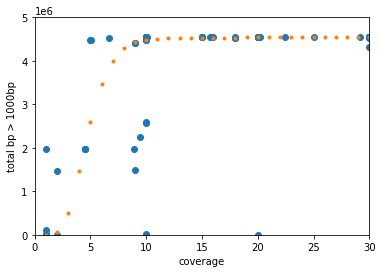

In [58]:
fig, ax = plt.subplots()

ax.plot(df.coverage, df.total_bp, 'o')
ax.plot(ctb_df.coverage, ctb_df.total_bp, '.')
ax.set_xlabel('coverage')
ax.set_ylabel('total bp > 1000bp')
ax.axis(xmin=0, ymin=0, xmax=30, ymax=5e6)

(0.0, 20.0, 1.0, 5000000.0)

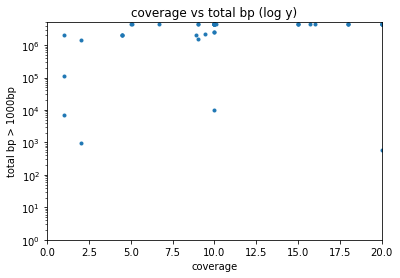

In [22]:
fig, ax = plt.subplots()

ax.plot(df.coverage, df.total_bp, '.')
ax.set_xlabel('coverage')
ax.set_ylabel('total bp > 1000bp')
ax.set_yscale('log')
ax.set_title('coverage vs total bp (log y)')
ax.axis(xmin=0, ymin=1, xmax=20, ymax=5e6)

(0.0, 20.0, 1.0, 5000000.0)

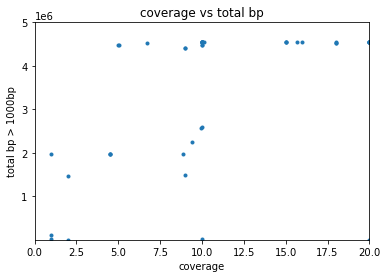

In [23]:
fig, ax = plt.subplots()

ax.plot(df.coverage, df.total_bp, '.')
ax.set_xlabel('coverage')
ax.set_ylabel('total bp > 1000bp')
ax.set_title('coverage vs total bp')
ax.axis(xmin=0, ymin=1, xmax=20, ymax=5e6)

In [ ]:
# practice in the field might be:
# total_reads is number of reads across all FASTQ files
# total_fragments is number of DNA fragments read, which is half the number of 
#     reads if you are using PE sequence files

In [24]:
df.head()

,index,assembly_name,total_reads,coverage,n50,total_bp,n_contigs,n_genes
0,1,SRR2584857.sub90k_assembly,90000,2.0,1043,1458742,970,3314
1,2,SRR2584857.sub450k_assembly,450000,10.0,85452,4539701,113,4205
2,3,SRR2584857.sub1350k_assembly,1350000,30.0,105235,4540377,92,4202
3,4,SRR2584857.sub1.3M_assembly,1350000,30.0,105235,4540377,92,4201
4,5,SRR2584857.sub2.2M_assembly,2250000,50.0,98799,4542425,92,4202


In [33]:
def total_fragments_to_coverage(n_reads):
    genome_size = 4.5e6
    read_length = 101
    n_pairs = 2
    return n_reads * read_length * n_pairs / genome_size

print(4.5e6, total_fragments_to_coverage(4.5e6))

def total_reads_to_coverage(n_reads):
    genome_size = 4.5e6
    read_length = 101
    return n_reads * read_length / genome_size

print(4.5e6, total_reads_to_coverage(4.5e6))

4500000.0 202.0
4500000.0 101.0


In [34]:
df['cov_from_reads'] = df['total_reads'].apply(total_reads_to_coverage)
df['cov_from_fragments'] = df['total_reads'].apply(total_fragments_to_coverage)

(0.0, 70.0, 1.0, 3000000.0)

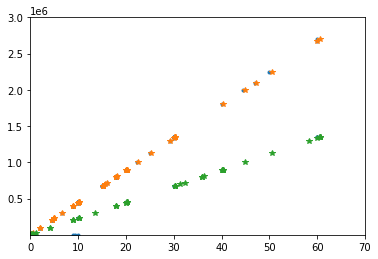

In [35]:
fig, ax = plt.subplots()

ax.plot(df.coverage, df.total_reads, '.')
ax.plot(df.cov_from_reads, df.total_reads, '*')
ax.plot(df.cov_from_fragments, df.total_reads, '*')

ax.axis(xmin=0, ymin=1, xmax=70, ymax=3e6)

In [37]:
df['n_contigs'].describe()

count    7.400000e+01
mean     8.056920e+04
std      5.454895e+05
min      1.000000e+00
25%      9.200000e+01
50%      1.105000e+02
75%      4.935000e+02
max      4.480425e+06
Name: n_contigs, dtype: float64

(0.0, 35.0, 1.0, 5000.0)

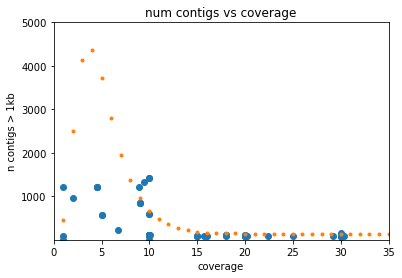

In [63]:
fig, ax = plt.subplots()

ax.set_xlabel('coverage')
ax.set_ylabel('n contigs > 1kb')
ax.set_title('num contigs vs coverage')
ax.plot(df.coverage, df.n_contigs, 'o')
ax.plot(ctb_df.coverage, ctb_df.n_contigs, '.')

ax.axis(xmin=0, ymin=1, xmax=35, ymax=5000)

(array([10., 20.,  5., 13.,  2., 11.,  2.,  2.,  1.,  5.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

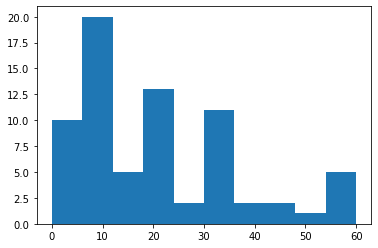

In [44]:
fig, ax = plt.subplots()

ax.hist(df.coverage, range=(0,60))

In [51]:
df['n_genes'].describe()

count      74.000000
mean     4050.770270
std       484.924385
min       597.000000
25%      4200.000000
50%      4203.000000
75%      4205.000000
max      4292.000000
Name: n_genes, dtype: float64

(0.0, 20.0, 1.0, 5000.0)

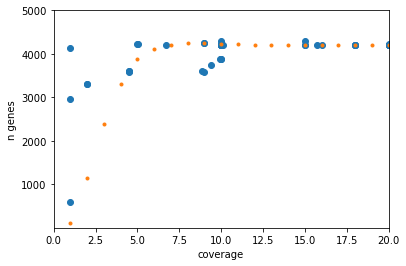

In [67]:
fig, ax = plt.subplots()

ax.set_xlabel('coverage')
ax.set_ylabel('n genes')
ax.plot(df.coverage, df.n_genes, 'o')
ax.plot(ctb_df.coverage, ctb_df.n_genes, '.')

ax.axis(xmin=0, ymin=1, xmax=20, ymax=5000)